In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
file_path = "drive/MyDrive/ObservationData_lavlqce.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Country,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
0,Malawi,1980,NaN,NaN,3038.14,2236.36,1104.30,238.76,865.54,306.24,...,21.48,-142.96,298.61,441.57,-6.39,13.35,19.75,-207.07,-9.26,NaN
1,Malawi,1981,-13.06,-10.81,2709.74,2236.40,1091.26,221.16,870.10,218.14,...,17.41,-133.47,276.61,410.09,-5.97,12.37,18.34,-86.71,-3.88,12.01
2,Malawi,1982,-0.93,1.44,2748.84,2113.68,1002.45,206.82,795.63,252.58,...,16.10,-119.21,254.71,373.92,-5.64,12.05,17.69,-91.15,-4.31,9.52
3,Malawi,1983,1.56,4.21,2864.70,2203.66,1037.06,200.81,836.26,278.87,...,15.73,-96.80,250.68,347.48,-4.39,11.38,15.77,-103.94,-4.72,13.77
4,Malawi,1984,0.54,3.92,2976.95,2157.88,1028.95,189.62,839.34,155.58,...,14.79,-78.94,239.30,318.24,-3.66,11.09,14.75,3.88,0.18,19.74


## Imputing NAN values

In [ ]:
for column in df.columns[1:]:
    column_mean = df.groupby("Country")[column].transform('mean')
    df[column].fillna(column_mean, inplace=True)

In [ ]:
df.head()

,Country,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
0,Malawi,1980,0.475808,3.31469,3038.14,2236.36,1104.30,238.76,865.54,306.24,...,21.48,-142.96,298.61,441.57,-6.39,13.35,19.75,-207.07,-9.26,18.729218
1,Malawi,1981,-13.060000,-10.81000,2709.74,2236.40,1091.26,221.16,870.10,218.14,...,17.41,-133.47,276.61,410.09,-5.97,12.37,18.34,-86.71,-3.88,12.010000
2,Malawi,1982,-0.930000,1.44000,2748.84,2113.68,1002.45,206.82,795.63,252.58,...,16.10,-119.21,254.71,373.92,-5.64,12.05,17.69,-91.15,-4.31,9.520000
3,Malawi,1983,1.560000,4.21000,2864.70,2203.66,1037.06,200.81,836.26,278.87,...,15.73,-96.80,250.68,347.48,-4.39,11.38,15.77,-103.94,-4.72,13.770000
4,Malawi,1984,0.540000,3.92000,2976.95,2157.88,1028.95,189.62,839.34,155.58,...,14.79,-78.94,239.30,318.24,-3.66,11.09,14.75,3.88,0.18,19.740000


In [ ]:
# Printing the nan values to make sure
for column in df.columns:
    nan_count = df[column].isna().sum()
    print(f"Number of NULL values in {column} is: {nan_count}")

Number of NULL values in Country is: 0
Number of NULL values in Year is: 0
Number of NULL values in Real per Capita GDP Growth Rate (annual %) is: 0
Number of NULL values in Real GDP growth (annual %) is: 0
Number of NULL values in Gross domestic product, (constant prices US$) is: 0
Number of NULL values in Gross domestic product, current prices (current US$) is: 0
Number of NULL values in Final consumption expenditure  (current US$) is: 0
Number of NULL values in General government final consumption expenditure (current US$) is: 0
Number of NULL values in Household final consumption expenditure (current US$) is: 0
Number of NULL values in Gross capital formation (current US$) is: 0
Number of NULL values in Gross capital formation, Private sector  (current US$) is: 0
Number of NULL values in Gross capital formation, Public sector  (current US$) is: 0
Number of NULL values in Exports of goods and services (current US$) is: 0
Number of NULL values in Imports of goods and services (curren

## Some statistical analysis

In [ ]:
df.describe()

,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
count,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,...,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000
mean,2001.000000,0.971532,3.481958,27009.099128,22609.755674,17177.809383,3105.453589,14072.355779,5072.281627,3089.637535,...,38.555941,-877.258293,4834.223598,5726.615694,-3.797465,21.674213,25.326589,-401.087734,-5.460002,13.037703
std,12.412347,7.938235,8.220302,63020.964940,56563.690709,44891.629533,8049.090118,38218.031852,12535.601963,7813.359991,...,23.441872,3722.515176,12296.667539,14729.699399,8.025644,11.570251,13.222984,3588.063436,10.099309,28.883947
min,1980.000000,-66.922658,-66.657000,104.150000,0.000000,29.820000,6.930000,21.430000,7.350000,-2301.810000,...,0.000000,-43076.459670,0.000000,0.000000,-130.797652,0.000000,0.000000,-27290.000000,-101.130000,-88.600000
25%,1990.000000,-1.287500,1.222500,2039.177500,1551.222500,1471.951037,239.716277,1179.552500,274.425532,106.950000,...,23.785000,-544.230488,329.990000,388.027500,-5.752942,14.537937,17.746709,-654.005000,-8.967500,2.709196
50%,2001.000000,1.260000,3.720000,7465.740000,5009.269855,4276.225000,722.455000,3650.290000,976.000000,415.325000,...,32.647425,-126.825000,1010.334127,1218.110000,-3.276520,19.450000,22.970000,-174.095000,-4.705000,6.475000
75%,2012.000000,3.453321,5.963899,18826.185880,14967.440000,11740.345718,2242.812643,9499.740698,3390.500190,1967.121343,...,48.487453,-22.730524,3033.267270,3559.281933,-1.200000,26.410275,31.323057,-19.057500,-0.974780,13.009870
max,2022.000000,123.339493,124.709000,488055.765400,568498.788200,444635.630000,82709.691690,407885.104800,122579.547600,74110.593060,...,222.880000,22895.330000,113828.182200,132405.491400,124.100000,167.540000,181.951867,37087.050000,61.273577,622.751634


In [ ]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,1.000000,0.065238,0.044193,0.175355,0.239807,0.255239,0.230493,0.251264,0.280020,0.261373,...,0.140532,-0.173455,0.222379,0.230467,0.080234,0.043836,-0.006472,-0.134177,-0.031522,-0.129869
Real per Capita GDP Growth Rate (annual %),0.065238,1.000000,0.991054,0.008361,0.018220,0.011598,0.011216,0.011261,0.022170,0.011159,...,0.085103,0.108547,0.046374,0.011522,0.206150,0.099494,-0.035171,0.116287,0.064279,-0.088579
Real GDP growth (annual %),0.044193,0.991054,1.000000,-0.004408,0.007038,-0.000227,-0.006183,0.001035,0.010342,0.001477,...,0.054393,0.114383,0.027819,-0.005601,0.210529,0.068254,-0.065834,0.114444,0.048607,-0.084826
"Gross domestic product, (constant prices US$)",0.175355,0.008361,-0.004408,1.000000,0.951252,0.934844,0.868518,0.915167,0.886530,0.842031,...,-0.183000,-0.609167,0.812438,0.835154,-0.005418,0.007538,0.016375,-0.132619,0.162287,-0.015720
"Gross domestic product, current prices (current US$)",0.239807,0.018220,0.007038,0.951252,1.000000,0.981243,0.869740,0.969412,0.920590,0.890204,...,-0.176255,-0.647466,0.815201,0.847850,-0.001343,-0.018319,-0.008413,-0.148858,0.145387,-0.032798
Final consumption expenditure (current US$),0.255239,0.011598,-0.000227,0.934844,0.981243,1.000000,0.857134,0.994098,0.889123,0.867633,...,-0.154382,-0.700685,0.789809,0.839054,-0.029753,-0.028921,-0.001868,-0.216703,0.107482,-0.032030
General government final consumption expenditure (current US$),0.230493,0.011216,-0.006183,0.868518,0.869740,0.857134,1.000000,0.796197,0.852627,0.825422,...,-0.110341,-0.622124,0.938019,0.944341,-0.033852,0.106799,0.120650,-0.227391,0.124512,-0.052721
Household final consumption expenditure (current US$),0.251264,0.011261,0.001035,0.915167,0.969412,0.994098,0.796197,1.000000,0.864809,0.845296,...,-0.158101,-0.692013,0.730168,0.786682,-0.027819,-0.056464,-0.027604,-0.206653,0.100027,-0.026520
Gross capital formation (current US$),0.280020,0.022170,0.010342,0.886530,0.920590,0.889123,0.852627,0.864809,1.000000,0.929118,...,-0.135109,-0.589398,0.829751,0.846040,-0.005758,0.055301,0.059530,-0.179867,0.130678,-0.055520
"Gross capital formation, Private sector (current US$)",0.261373,0.011159,0.001477,0.842031,0.890204,0.867633,0.825422,0.845296,0.929118,1.000000,...,-0.139391,-0.602929,0.804377,0.827749,-0.007584,0.054703,0.060197,-0.205817,0.119120,-0.049103


## Dividing the dataframe into chunks, each chunk containing one country with its data

In [ ]:
chunk_dataframes=[]
for i in range(0, len(df), 43):
    chunk_df = df.iloc[i:i + 43]
    chunk_dataframes.append(pd.DataFrame(chunk_df))

In [ ]:
# Get the country name of the dataframe
chunk_dataframes[1]["Country"].iloc[0]

'Algeria'

## Get the mean for each year

In [ ]:
years = chunk_dataframes[1]["Year"]

In [ ]:
df_mean = df.groupby('Year').mean()
df_mean

<ipython-input-13-e6efb429e63c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('Year').mean()


,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,,,,,,,,,,,,,,,,,,,,,
1980,0.971532,3.481958,13600.737325,10415.857407,5500.209700,1159.187997,4341.023179,1846.959092,1620.237774,1056.797145,...,36.167058,-281.629445,2004.025804,2266.199297,-5.651655,21.493650,26.743294,50.018376,-7.163063,13.037703
1981,-0.823321,2.054507,13744.409177,9891.282407,5863.216552,1239.321330,4623.896142,1973.862981,1662.408118,987.463475,...,37.646317,-490.911667,1975.049508,2446.505408,-6.331100,21.026243,26.955887,-329.303846,-7.639730,18.850817
1982,-0.179432,2.695989,14005.087510,9709.049444,5777.038774,1224.212441,4552.826883,1752.806685,1528.729229,893.654771,...,37.131317,-634.604260,1927.186545,2542.335408,-7.022581,22.110131,28.731072,-324.617735,-8.777878,15.254397
1983,-2.354617,0.458581,14052.476584,9884.352963,5491.232478,1205.945960,4285.286327,1646.330389,1413.759970,883.438104,...,34.617984,-542.346297,1849.040184,2389.676890,-5.822952,21.503899,27.217183,-160.231068,-5.734730,17.481248
1984,-0.871840,1.970618,14500.541769,9642.634259,5335.803034,1149.978923,4185.822994,1572.464463,1408.189229,818.120512,...,34.655762,-500.135371,1824.868147,2323.293001,-5.108322,21.344269,26.342183,-113.255513,-5.128804,17.460508
1985,1.270568,4.192655,15023.920473,9579.648704,5281.441367,1127.154108,4154.287068,1482.705389,1308.326451,809.268475,...,34.077799,-396.718519,1869.455184,2264.464112,-4.511285,21.340010,25.741443,11.273561,-4.448619,19.213471
1986,-0.309803,2.578952,15214.743436,8491.853704,5722.387293,1245.076330,4477.312623,1558.773537,1340.532933,798.236438,...,32.548354,-556.560001,1870.960555,2425.810223,-5.151100,21.620010,26.660702,-138.326809,-4.426767,17.032730
1987,-1.027025,1.827100,15355.551954,8427.820000,6271.077478,1386.007256,4885.070031,1608.119277,1322.791821,882.626252,...,32.891132,-618.021482,1936.426110,2552.736149,-5.556100,21.060195,26.505146,-154.109626,-4.035939,23.188656
1988,1.462790,4.329692,16041.673621,9039.920185,6533.029145,1404.285404,5128.743920,1717.829092,1452.848673,939.388104,...,32.850021,-703.270556,2013.599999,2715.161149,-5.706841,20.810195,26.407554,-277.012403,-4.838902,18.135137


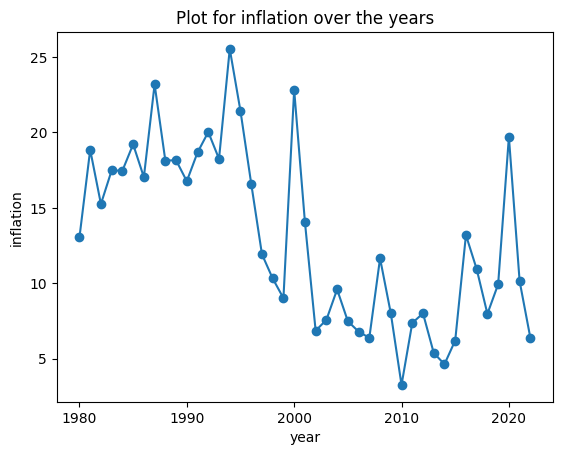

In [ ]:
plt.plot(years,df_mean['Inflation, consumer prices (annual %)'], marker='o')
plt.title("Plot for inflation over the years")
plt.xlabel("year")
plt.ylabel("inflation")
plt.show()

In [ ]:
df_mean['Year']=years
df_mean

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)",Year
Year,,,,,,,,,,,,,,,,,,,,,
1980,0.971532,3.481958,13600.737325,10415.857407,5500.209700,1159.187997,4341.023179,1846.959092,1620.237774,1056.797145,...,-281.629445,2004.025804,2266.199297,-5.651655,21.493650,26.743294,50.018376,-7.163063,13.037703,NaN
1981,-0.823321,2.054507,13744.409177,9891.282407,5863.216552,1239.321330,4623.896142,1973.862981,1662.408118,987.463475,...,-490.911667,1975.049508,2446.505408,-6.331100,21.026243,26.955887,-329.303846,-7.639730,18.850817,NaN
1982,-0.179432,2.695989,14005.087510,9709.049444,5777.038774,1224.212441,4552.826883,1752.806685,1528.729229,893.654771,...,-634.604260,1927.186545,2542.335408,-7.022581,22.110131,28.731072,-324.617735,-8.777878,15.254397,NaN
1983,-2.354617,0.458581,14052.476584,9884.352963,5491.232478,1205.945960,4285.286327,1646.330389,1413.759970,883.438104,...,-542.346297,1849.040184,2389.676890,-5.822952,21.503899,27.217183,-160.231068,-5.734730,17.481248,NaN
1984,-0.871840,1.970618,14500.541769,9642.634259,5335.803034,1149.978923,4185.822994,1572.464463,1408.189229,818.120512,...,-500.135371,1824.868147,2323.293001,-5.108322,21.344269,26.342183,-113.255513,-5.128804,17.460508,NaN
1985,1.270568,4.192655,15023.920473,9579.648704,5281.441367,1127.154108,4154.287068,1482.705389,1308.326451,809.268475,...,-396.718519,1869.455184,2264.464112,-4.511285,21.340010,25.741443,11.273561,-4.448619,19.213471,NaN
1986,-0.309803,2.578952,15214.743436,8491.853704,5722.387293,1245.076330,4477.312623,1558.773537,1340.532933,798.236438,...,-556.560001,1870.960555,2425.810223,-5.151100,21.620010,26.660702,-138.326809,-4.426767,17.032730,NaN
1987,-1.027025,1.827100,15355.551954,8427.820000,6271.077478,1386.007256,4885.070031,1608.119277,1322.791821,882.626252,...,-618.021482,1936.426110,2552.736149,-5.556100,21.060195,26.505146,-154.109626,-4.035939,23.188656,NaN
1988,1.462790,4.329692,16041.673621,9039.920185,6533.029145,1404.285404,5128.743920,1717.829092,1452.848673,939.388104,...,-703.270556,2013.599999,2715.161149,-5.706841,20.810195,26.407554,-277.012403,-4.838902,18.135137,NaN


## Decomposition of the data

In [ ]:
df_mean.set_index("Year")

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,,,,,,,,,,,,,,,,,,,,,
NaN,0.971532,3.481958,13600.737325,10415.857407,5500.209700,1159.187997,4341.023179,1846.959092,1620.237774,1056.797145,...,36.167058,-281.629445,2004.025804,2266.199297,-5.651655,21.493650,26.743294,50.018376,-7.163063,13.037703
NaN,-0.823321,2.054507,13744.409177,9891.282407,5863.216552,1239.321330,4623.896142,1973.862981,1662.408118,987.463475,...,37.646317,-490.911667,1975.049508,2446.505408,-6.331100,21.026243,26.955887,-329.303846,-7.639730,18.850817
NaN,-0.179432,2.695989,14005.087510,9709.049444,5777.038774,1224.212441,4552.826883,1752.806685,1528.729229,893.654771,...,37.131317,-634.604260,1927.186545,2542.335408,-7.022581,22.110131,28.731072,-324.617735,-8.777878,15.254397
NaN,-2.354617,0.458581,14052.476584,9884.352963,5491.232478,1205.945960,4285.286327,1646.330389,1413.759970,883.438104,...,34.617984,-542.346297,1849.040184,2389.676890,-5.822952,21.503899,27.217183,-160.231068,-5.734730,17.481248
NaN,-0.871840,1.970618,14500.541769,9642.634259,5335.803034,1149.978923,4185.822994,1572.464463,1408.189229,818.120512,...,34.655762,-500.135371,1824.868147,2323.293001,-5.108322,21.344269,26.342183,-113.255513,-5.128804,17.460508
NaN,1.270568,4.192655,15023.920473,9579.648704,5281.441367,1127.154108,4154.287068,1482.705389,1308.326451,809.268475,...,34.077799,-396.718519,1869.455184,2264.464112,-4.511285,21.340010,25.741443,11.273561,-4.448619,19.213471
NaN,-0.309803,2.578952,15214.743436,8491.853704,5722.387293,1245.076330,4477.312623,1558.773537,1340.532933,798.236438,...,32.548354,-556.560001,1870.960555,2425.810223,-5.151100,21.620010,26.660702,-138.326809,-4.426767,17.032730
NaN,-1.027025,1.827100,15355.551954,8427.820000,6271.077478,1386.007256,4885.070031,1608.119277,1322.791821,882.626252,...,32.891132,-618.021482,1936.426110,2552.736149,-5.556100,21.060195,26.505146,-154.109626,-4.035939,23.188656
NaN,1.462790,4.329692,16041.673621,9039.920185,6533.029145,1404.285404,5128.743920,1717.829092,1452.848673,939.388104,...,32.850021,-703.270556,2013.599999,2715.161149,-5.706841,20.810195,26.407554,-277.012403,-4.838902,18.135137


In [ ]:
df_mean = df_mean.drop("Year", axis=1)

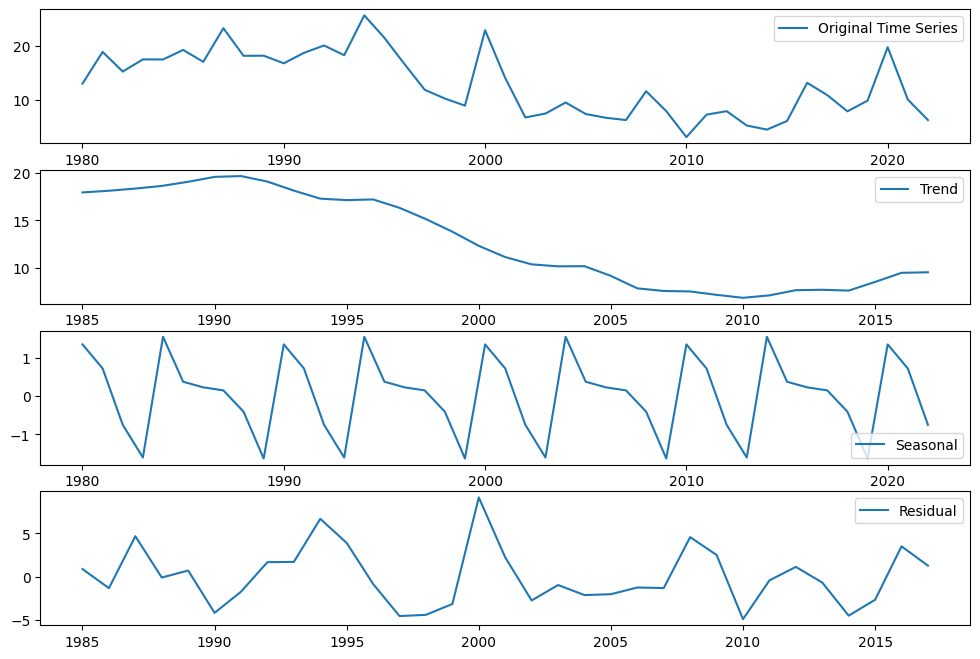

In [ ]:
result = seasonal_decompose(df_mean['Inflation, consumer prices (annual %)'], model='additive', period = 10)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_mean['Inflation, consumer prices (annual %)'], label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.show()

## phillips-perron and adf tests

In [ ]:
!pip install arch

In [ ]:
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron

In [ ]:
# ADF test
for column in df_mean.columns:
  print(ADF(df_mean[column]))

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.593
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.60 (1%), -2.93 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -4.686
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.60 (1%), -2.93 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                  2.479
P-value                         0.999
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.60 (1%), -2.93 (5%), -2.60 (10%)
Nu

In [ ]:
# Phillips-Perron Test
for column in df_mean.columns:
  print(PhillipsPerron(df_mean[column]))

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.851
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.60 (1%), -2.93 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.785
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.60 (1%), -2.93 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                  1.457
P-value                         0.997
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.60 (1%), -2.93 (5%), -2.60 (10%)
Nu

## Kruskal and Mann_Kendall tests

In [ ]:
!pip install pymannkendall

In [ ]:
import pymannkendall as mk
from scipy.stats import kruskal

In [ ]:
# Kruskal test
for column in df_mean.columns:

  h_stat, p_value = kruskal(*df_mean[column])

  print(f"H-statistic: {h_stat:.4f}")
  print(f"p-value: {p_value:.4f}")


  if p_value < 0.05:
      print(f"For column {column} Reject null hypothesis. \n")
  else:
      print(f"For column {column} Fail to reject null hypothesis. \n")

H-statistic: 42.0000
p-value: 0.4710
For column Real per Capita GDP Growth Rate (annual %) Fail to reject null hypothesis. 

H-statistic: 42.0000
p-value: 0.4710
For column Real GDP growth (annual %) Fail to reject null hypothesis. 

H-statistic: 42.0000
p-value: 0.4710
For column Gross domestic product, (constant prices US$) Fail to reject null hypothesis. 

H-statistic: 42.0000
p-value: 0.4710
For column Gross domestic product, current prices (current US$) Fail to reject null hypothesis. 

H-statistic: 42.0000
p-value: 0.4710
For column Final consumption expenditure  (current US$) Fail to reject null hypothesis. 

H-statistic: 42.0000
p-value: 0.4710
For column General government final consumption expenditure (current US$) Fail to reject null hypothesis. 

H-statistic: 42.0000
p-value: 0.4710
For column Household final consumption expenditure (current US$) Fail to reject null hypothesis. 

H-statistic: 42.0000
p-value: 0.4710
For column Gross capital formation (current US$) Fail to r

In [ ]:
# Mann_Kendall test
for column in df_mean.columns:
  print(mk.original_test(df_mean[column]))

Mann_Kendall_Test(trend='increasing', h=True, p=0.011320981220790172, z=2.532631763621401, Tau=0.2691029900332226, s=243.0, var_s=9130.333333333334, slope=0.05833954974988977, intercept=0.12653730847453715)
Mann_Kendall_Test(trend='no trend', h=False, p=0.0624840977555301, z=1.8628448509281381, Tau=0.1982281284606866, s=179.0, var_s=9130.333333333334, slope=0.04512962962962961, intercept=2.86456269454784)
Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=9.35608593668402, Tau=0.991140642303433, s=895.0, var_s=9130.333333333334, slope=893.9210161839502, intercept=3974.9163551883285)
Mann_Kendall_Test(trend='increasing', h=True, p=3.1086244689504383e-15, z=7.8909270651675065, Tau=0.8361018826135105, s=755.0, var_s=9130.333333333334, slope=1028.542484565881, intercept=-9674.141868837207)
Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=8.728160706034085, Tau=0.9246954595791805, s=835.0, var_s=9130.333333333334, slope=874.5657662719217, intercept=-9152.526836565294)
Mann_Kendall

## Granger Causality Test

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
# Removing the trend
df_diff = df_mean.diff().dropna()

In [ ]:
df_diff.head()

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,,,,,,,,,,,,,,,,,,,,,
1981,-1.794853,-1.427451,143.671852,-524.575000,363.006852,80.133333,282.872963,126.903889,42.170344,-69.333671,...,1.479259,-209.282222,-28.976296,180.306111,-0.679444,-0.467407,0.212593,-379.322222,-0.476667,5.813114
1982,0.643889,0.641481,260.678333,-182.232963,-86.177778,-15.108889,-71.069259,-221.056296,-133.678889,-93.808704,...,-0.515000,-143.692593,-47.862963,95.830000,-0.691481,1.083889,1.775185,4.686111,-1.138148,-3.596421
1983,-2.175185,-2.237407,47.389074,175.303519,-285.806296,-18.266481,-267.540556,-106.476296,-114.969259,-10.216667,...,-2.513333,92.257963,-78.146361,-152.658519,1.199630,-0.606233,-1.513889,164.386667,3.043148,2.226852
1984,1.482778,1.512037,448.065185,-241.718704,-155.429444,-55.967037,-99.463333,-73.865926,-5.570741,-65.317593,...,0.037778,42.210926,-24.172037,-66.383889,0.714630,-0.159630,-0.875000,46.975556,0.605926,-0.020741
1985,2.142407,2.222037,523.378704,-62.985556,-54.361667,-22.824815,-31.535926,-89.759074,-99.862778,-8.852037,...,-0.577963,103.416852,44.587037,-58.828889,0.597037,-0.004259,-0.600741,124.529074,0.680185,1.752963


In [ ]:
for column in df_mean.columns[:-1]:
  gc_res = grangercausalitytests(df_mean[[column,'Inflation, consumer prices (annual %)']], 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0080  , p=0.9293  , df_denom=39, df_num=1
ssr based chi2 test:   chi2=0.0086  , p=0.9261  , df=1
likelihood ratio test: chi2=0.0086  , p=0.9261  , df=1
parameter F test:         F=0.0080  , p=0.9293  , df_denom=39, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2464  , p=0.7829  , df_denom=36, df_num=2
ssr based chi2 test:   chi2=0.5612  , p=0.7553  , df=2
likelihood ratio test: chi2=0.5574  , p=0.7568  , df=2
parameter F test:         F=0.2464  , p=0.7829  , df_denom=36, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5054  , p=0.6812  , df_denom=33, df_num=3
ssr based chi2 test:   chi2=1.8378  , p=0.6067  , df=3
likelihood ratio test: chi2=1.7969  , p=0.6156  , df=3
parameter F test:         F=0.5054  , p=0.6812  , df_denom=33, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1908  , p=0.9413  , df_d

In [ ]:
for column in df_diff.columns[:-1]:
  gc_res = grangercausalitytests(df_diff[[column,'Inflation, consumer prices (annual %)']], 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3580  , p=0.1329  , df_denom=38, df_num=1
ssr based chi2 test:   chi2=2.5441  , p=0.1107  , df=1
likelihood ratio test: chi2=2.4683  , p=0.1162  , df=1
parameter F test:         F=2.3580  , p=0.1329  , df_denom=38, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9819  , p=0.1530  , df_denom=35, df_num=2
ssr based chi2 test:   chi2=4.5301  , p=0.1038  , df=2
likelihood ratio test: chi2=4.2914  , p=0.1170  , df=2
parameter F test:         F=1.9819  , p=0.1530  , df_denom=35, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7541  , p=0.5282  , df_denom=32, df_num=3
ssr based chi2 test:   chi2=2.7570  , p=0.4306  , df=3
likelihood ratio test: chi2=2.6639  , p=0.4464  , df=3
parameter F test:         F=0.7541  , p=0.5282  , df_denom=32, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3133  , p=0.8667  , df_d

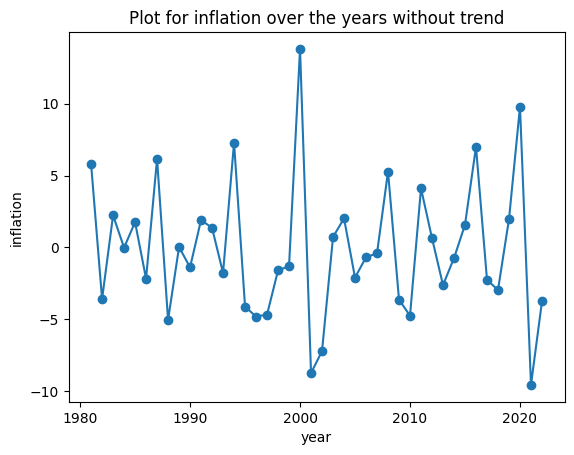

In [ ]:
years = years[years!=1980]

plt.plot(years,df_diff['Inflation, consumer prices (annual %)'], marker='o')
plt.title("Plot for inflation over the years without trend")
plt.xlabel("year")
plt.ylabel("inflation")
plt.show()

## Correlation matrix

In [ ]:
correlation_matrix = df_diff.corr()
correlation_matrix

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Real per Capita GDP Growth Rate (annual %),1.000000,0.999284,0.497825,0.307231,0.095311,0.074406,0.097127,0.318821,0.120785,0.223856,...,0.128149,0.559167,0.380507,-0.020406,0.614163,0.295705,-0.487228,0.417714,0.412537,-0.557524
Real GDP growth (annual %),0.999284,1.000000,0.496701,0.305818,0.096884,0.076274,0.098559,0.320148,0.123662,0.221339,...,0.132417,0.556258,0.381969,-0.015809,0.611796,0.297223,-0.482577,0.413944,0.411774,-0.556659
"Gross domestic product, (constant prices US$)",0.497825,0.496701,1.000000,0.623016,0.543126,0.370629,0.567736,0.680397,0.310014,0.391615,...,0.125323,0.395580,0.535409,0.349548,0.429414,0.289127,-0.304837,0.202841,0.243662,-0.410810
"Gross domestic product, current prices (current US$)",0.307231,0.305818,0.623016,1.000000,0.887805,0.855424,0.861343,0.912869,0.652653,0.212012,...,0.251278,0.426011,0.875898,0.819558,0.385148,0.486618,-0.190088,0.366332,0.153253,-0.168036
Final consumption expenditure (current US$),0.095311,0.096884,0.543126,0.887805,1.000000,0.881811,0.992029,0.827985,0.675852,0.096184,...,0.183169,0.044470,0.658966,0.806466,0.106093,0.294025,0.080215,0.011019,-0.066470,-0.101308
General government final consumption expenditure (current US$),0.074406,0.076274,0.370629,0.855424,0.881811,1.000000,0.815353,0.792326,0.700951,0.019937,...,0.329215,0.107605,0.699924,0.815826,0.121694,0.310990,0.055288,0.096406,-0.099736,-0.048426
Household final consumption expenditure (current US$),0.097127,0.098559,0.567736,0.861343,0.992029,0.815353,1.000000,0.804765,0.642414,0.112754,...,0.136901,0.025841,0.621959,0.772068,0.097728,0.277863,0.083703,-0.012232,-0.054953,-0.111431
Gross capital formation (current US$),0.318821,0.320148,0.680397,0.912869,0.827985,0.792326,0.804765,1.000000,0.637062,0.334204,...,0.298587,0.407407,0.826127,0.781441,0.382890,0.520497,-0.184178,0.248139,0.158049,-0.185527
"Gross capital formation, Private sector (current US$)",0.120785,0.123662,0.310014,0.652653,0.675852,0.700951,0.642414,0.637062,1.000000,-0.499269,...,0.156330,0.079474,0.534586,0.566010,0.116577,0.107563,-0.069443,-0.070266,0.003622,-0.183716
"Gross capital formation, Public sector (current US$)",0.223856,0.221339,0.391615,0.212012,0.096184,0.019937,0.112754,0.334204,-0.499269,1.000000,...,0.149116,0.339428,0.258472,0.183696,0.264732,0.451301,-0.088146,0.350471,0.153299,-0.003446


In [ ]:
standardized = df_diff.copy()

for column in df_diff.columns:
  standardized[column] = (standardized[column] - standardized[column].mean()) / standardized[column].std()

In [ ]:
correlation_matrix = standardized.corr()
correlation_matrix

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Real per Capita GDP Growth Rate (annual %),1.000000,0.999284,0.497825,0.307231,0.095311,0.074406,0.097127,0.318821,0.120785,0.223856,...,0.128149,0.559167,0.380507,-0.020406,0.614163,0.295705,-0.487228,0.417714,0.412537,-0.557524
Real GDP growth (annual %),0.999284,1.000000,0.496701,0.305818,0.096884,0.076274,0.098559,0.320148,0.123662,0.221339,...,0.132417,0.556258,0.381969,-0.015809,0.611796,0.297223,-0.482577,0.413944,0.411774,-0.556659
"Gross domestic product, (constant prices US$)",0.497825,0.496701,1.000000,0.623016,0.543126,0.370629,0.567736,0.680397,0.310014,0.391615,...,0.125323,0.395580,0.535409,0.349548,0.429414,0.289127,-0.304837,0.202841,0.243662,-0.410810
"Gross domestic product, current prices (current US$)",0.307231,0.305818,0.623016,1.000000,0.887805,0.855424,0.861343,0.912869,0.652653,0.212012,...,0.251278,0.426011,0.875898,0.819558,0.385148,0.486618,-0.190088,0.366332,0.153253,-0.168036
Final consumption expenditure (current US$),0.095311,0.096884,0.543126,0.887805,1.000000,0.881811,0.992029,0.827985,0.675852,0.096184,...,0.183169,0.044470,0.658966,0.806466,0.106093,0.294025,0.080215,0.011019,-0.066470,-0.101308
General government final consumption expenditure (current US$),0.074406,0.076274,0.370629,0.855424,0.881811,1.000000,0.815353,0.792326,0.700951,0.019937,...,0.329215,0.107605,0.699924,0.815826,0.121694,0.310990,0.055288,0.096406,-0.099736,-0.048426
Household final consumption expenditure (current US$),0.097127,0.098559,0.567736,0.861343,0.992029,0.815353,1.000000,0.804765,0.642414,0.112754,...,0.136901,0.025841,0.621959,0.772068,0.097728,0.277863,0.083703,-0.012232,-0.054953,-0.111431
Gross capital formation (current US$),0.318821,0.320148,0.680397,0.912869,0.827985,0.792326,0.804765,1.000000,0.637062,0.334204,...,0.298587,0.407407,0.826127,0.781441,0.382890,0.520497,-0.184178,0.248139,0.158049,-0.185527
"Gross capital formation, Private sector (current US$)",0.120785,0.123662,0.310014,0.652653,0.675852,0.700951,0.642414,0.637062,1.000000,-0.499269,...,0.156330,0.079474,0.534586,0.566010,0.116577,0.107563,-0.069443,-0.070266,0.003622,-0.183716
"Gross capital formation, Public sector (current US$)",0.223856,0.221339,0.391615,0.212012,0.096184,0.019937,0.112754,0.334204,-0.499269,1.000000,...,0.149116,0.339428,0.258472,0.183696,0.264732,0.451301,-0.088146,0.350471,0.153299,-0.003446


## Plotting ACF and PACF

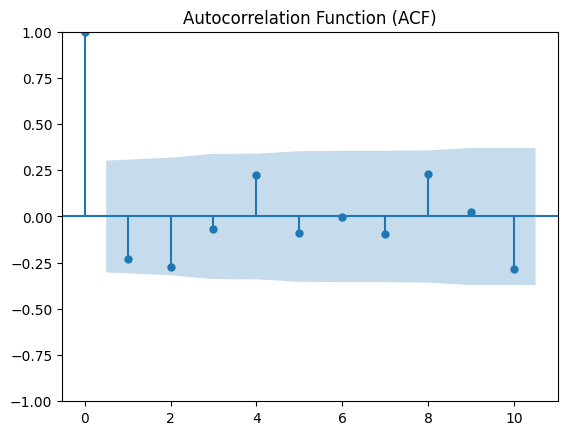

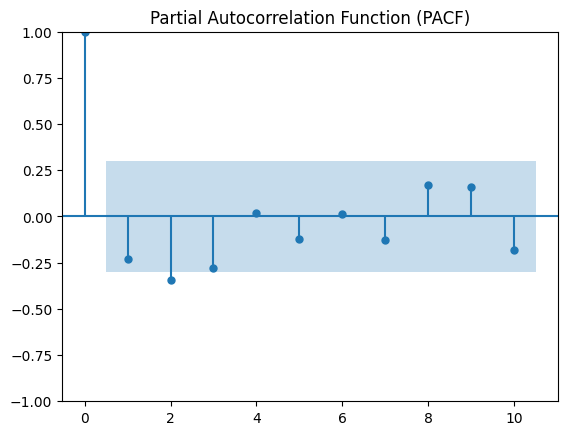

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_diff['Inflation, consumer prices (annual %)'], lags=10)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df_diff['Inflation, consumer prices (annual %)'], lags=10)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

## Applying Kalman filter

In [ ]:
!pip install pykalman

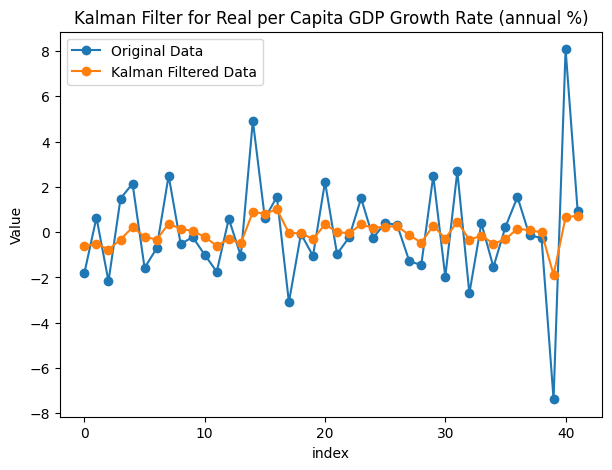

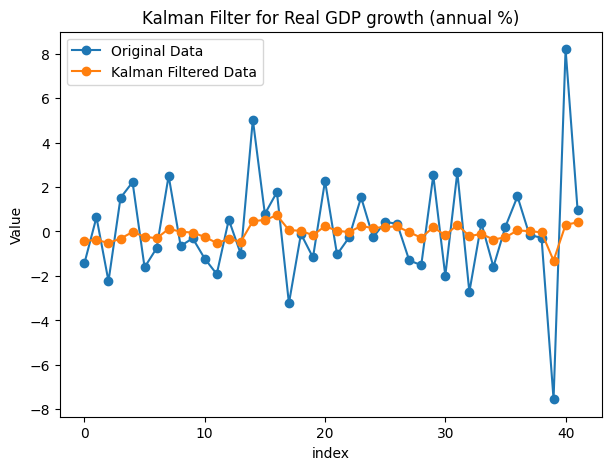

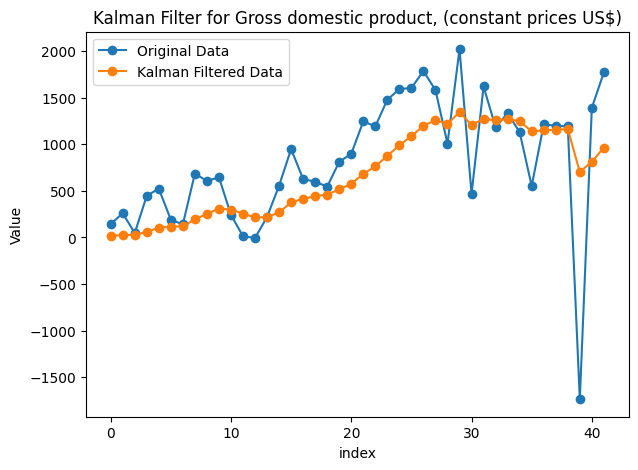

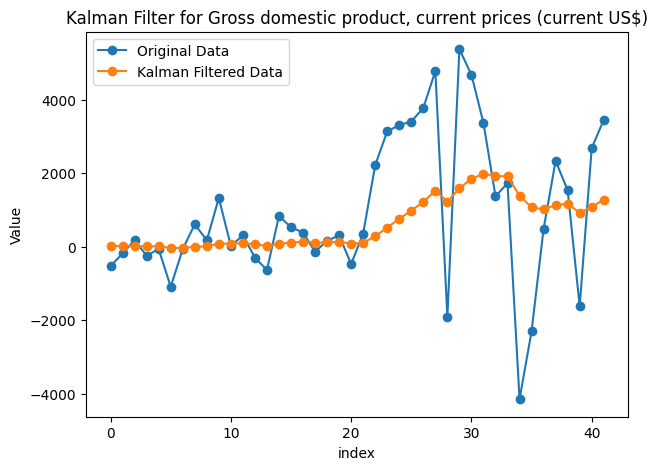

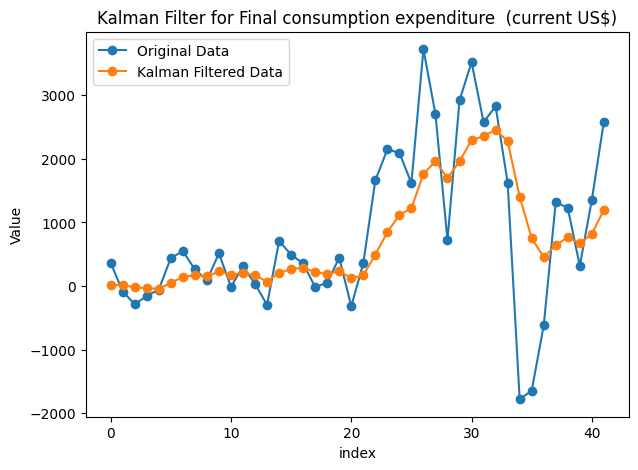

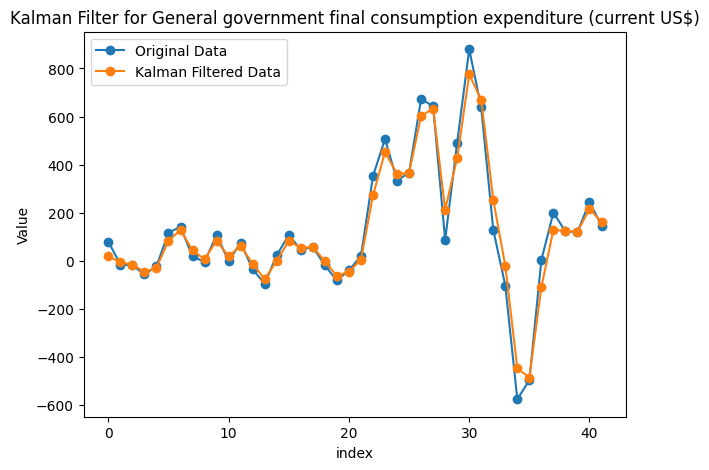

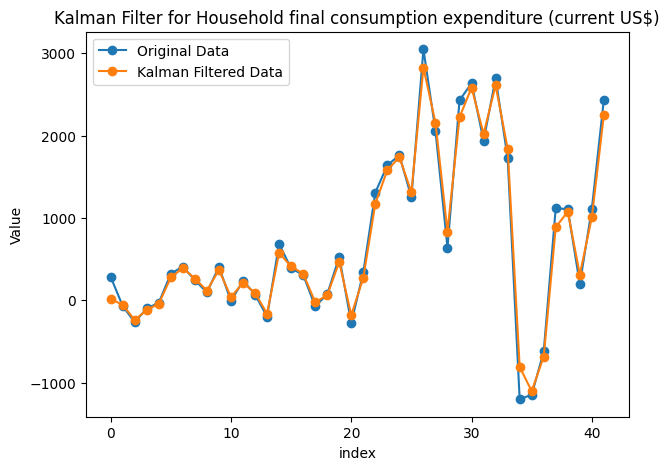

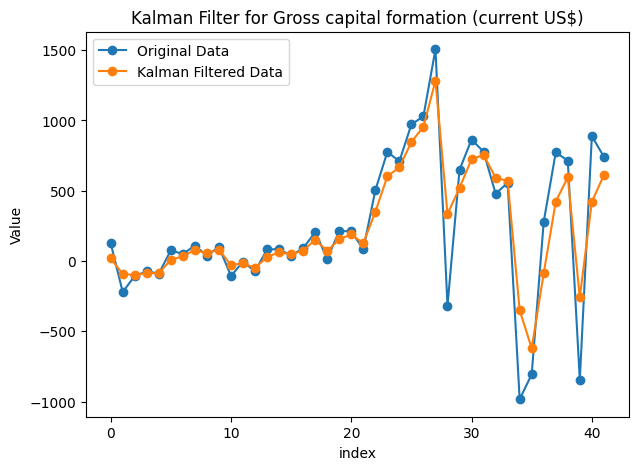

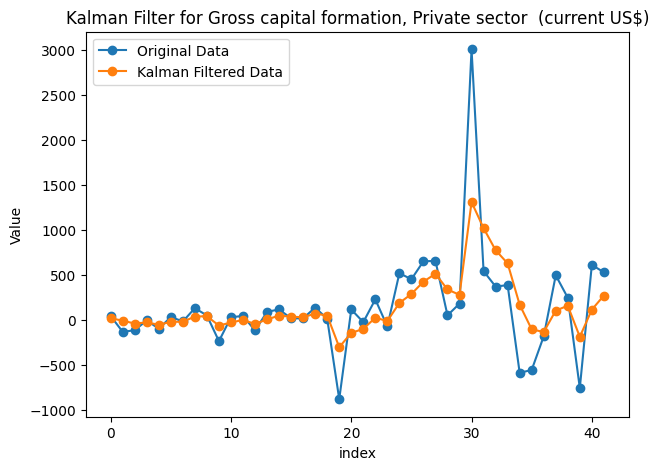

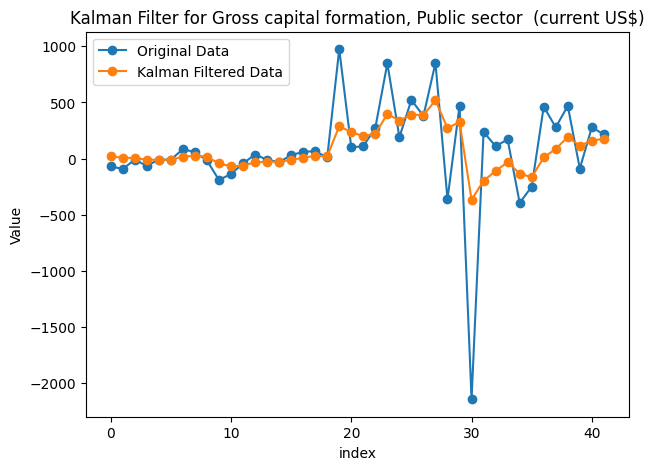

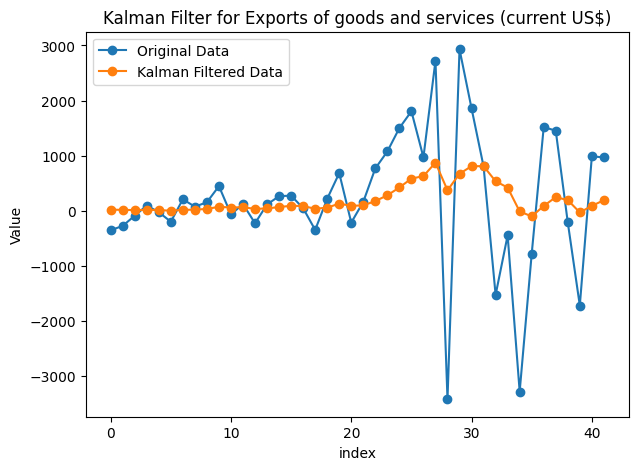

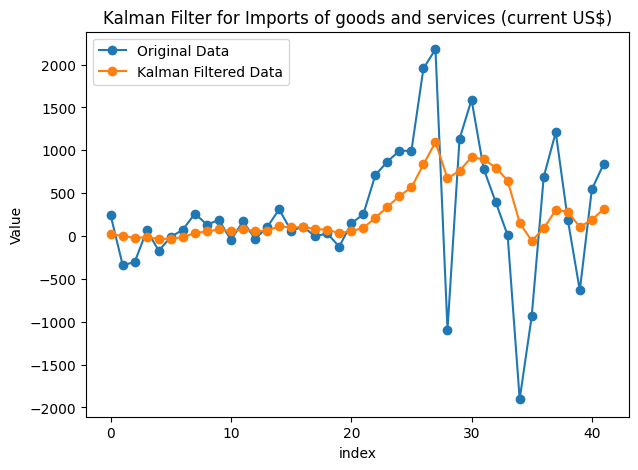

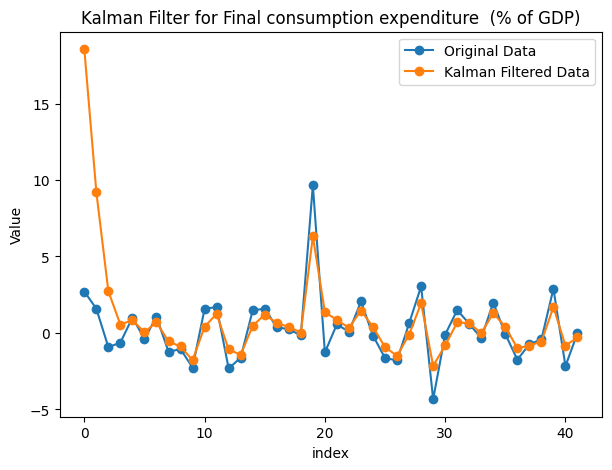

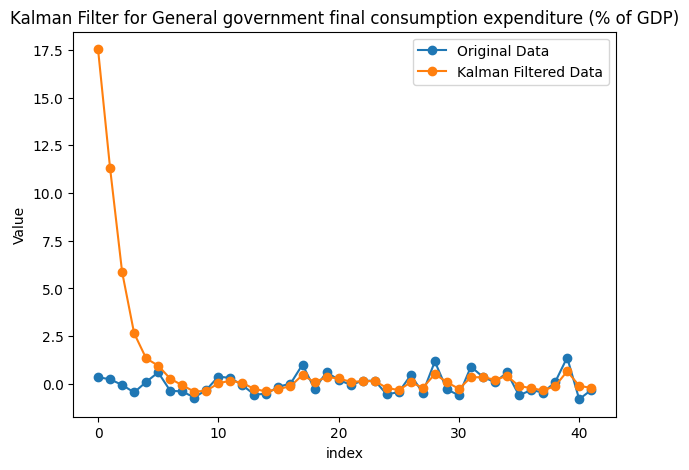

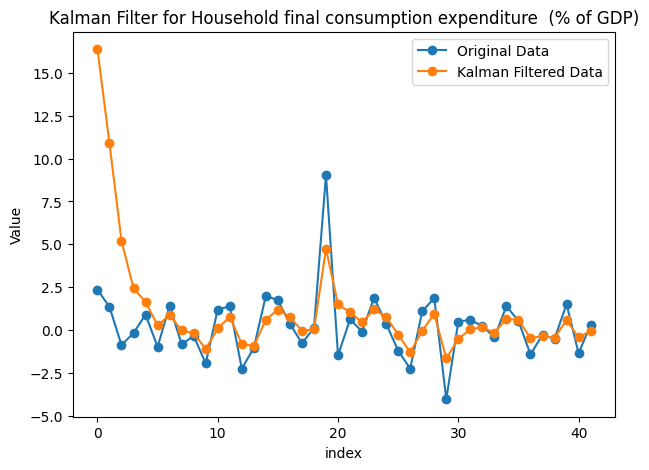

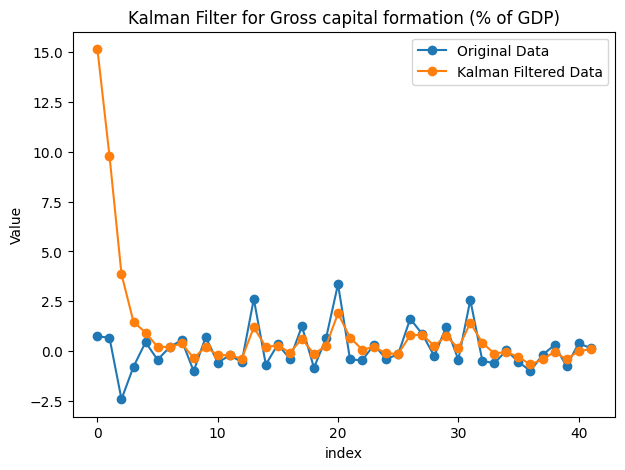

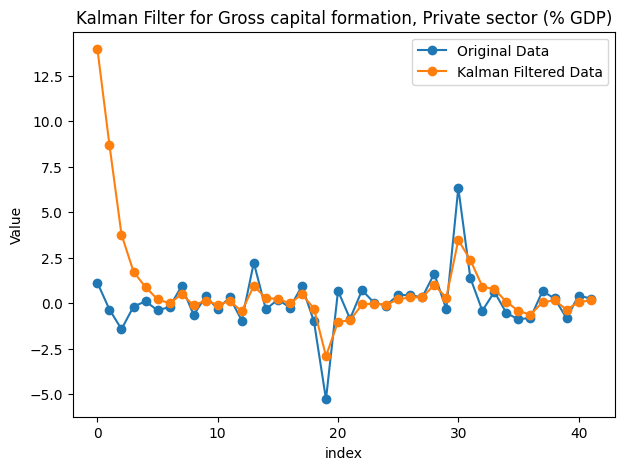

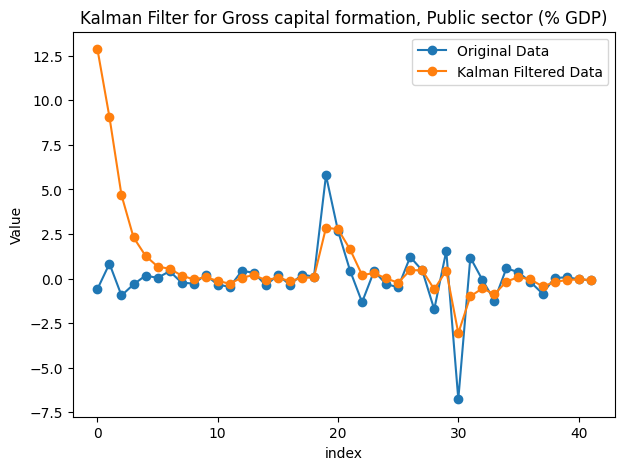

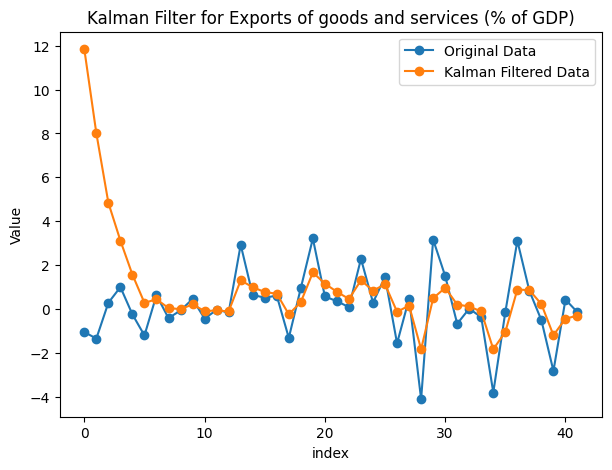

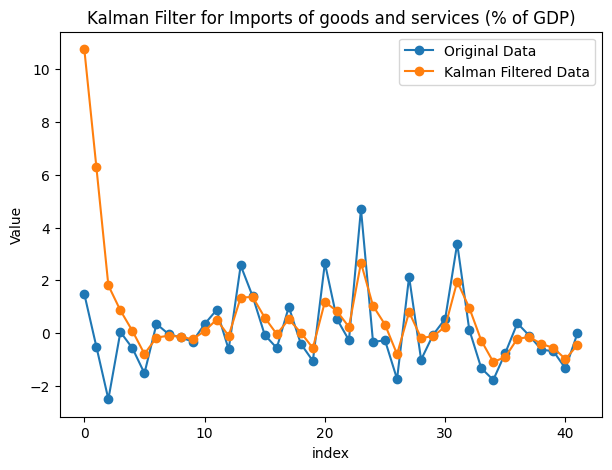

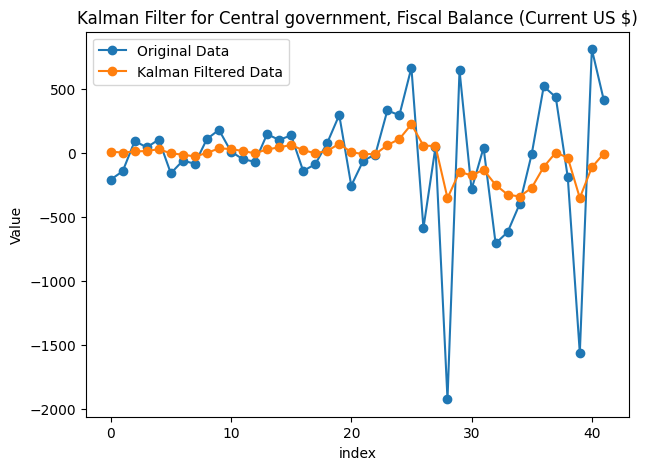

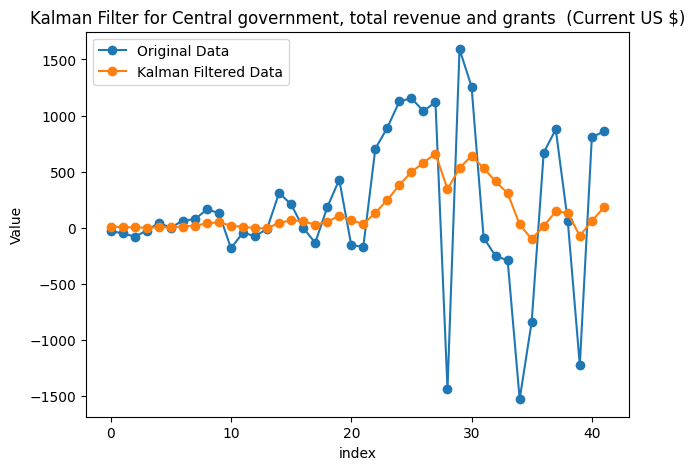

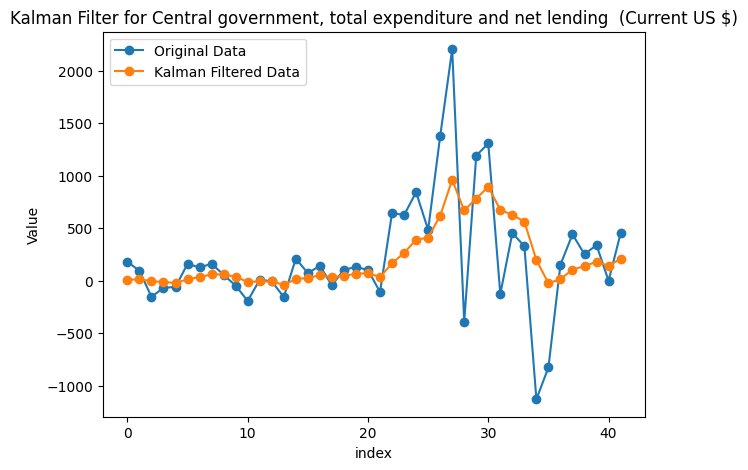

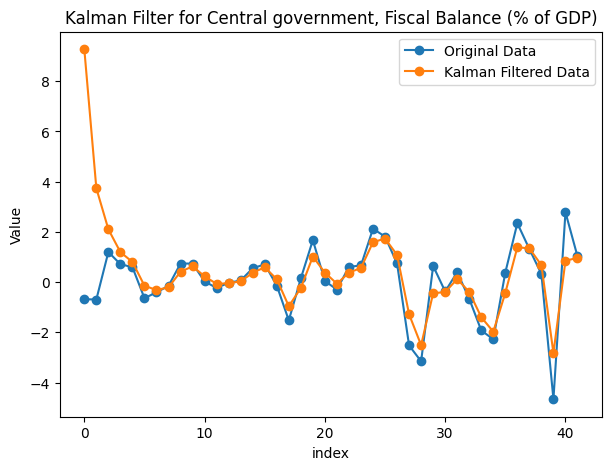

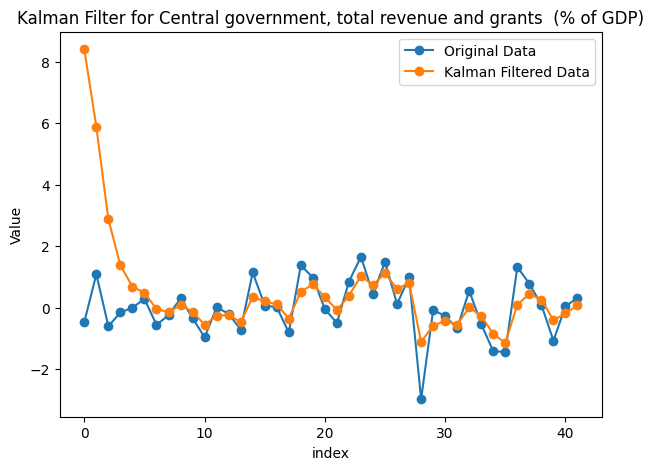

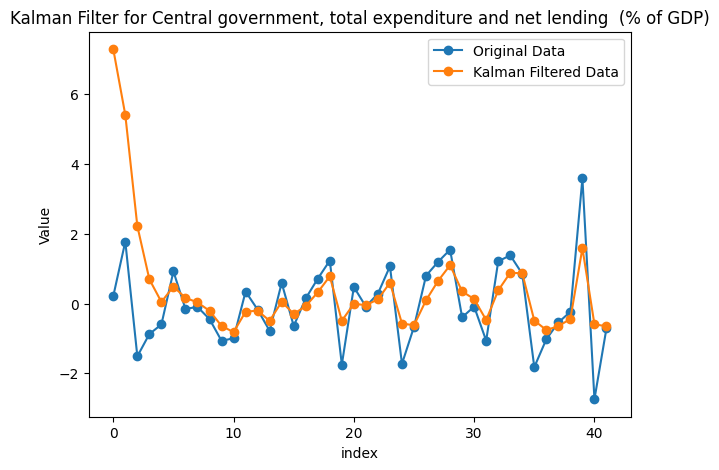

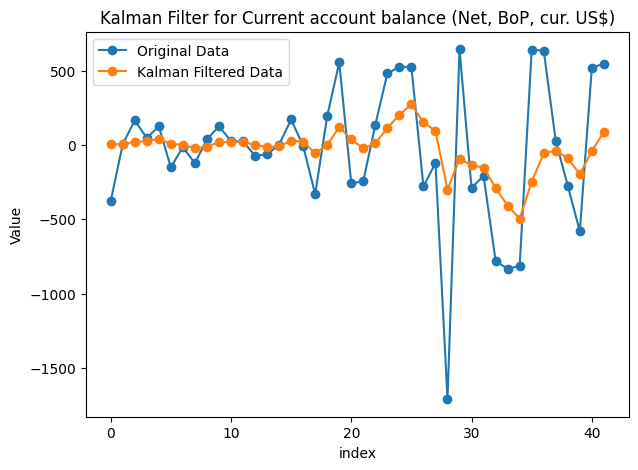

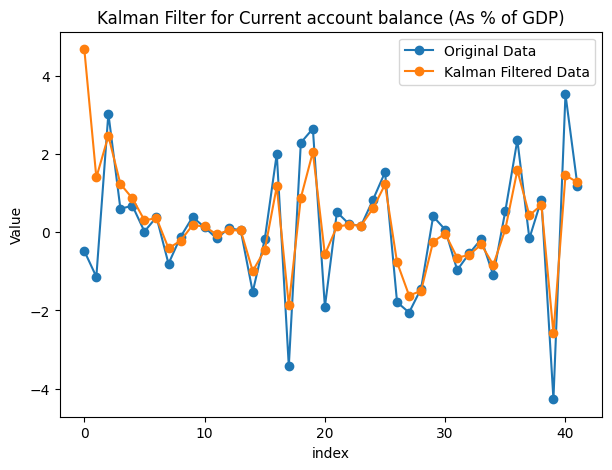

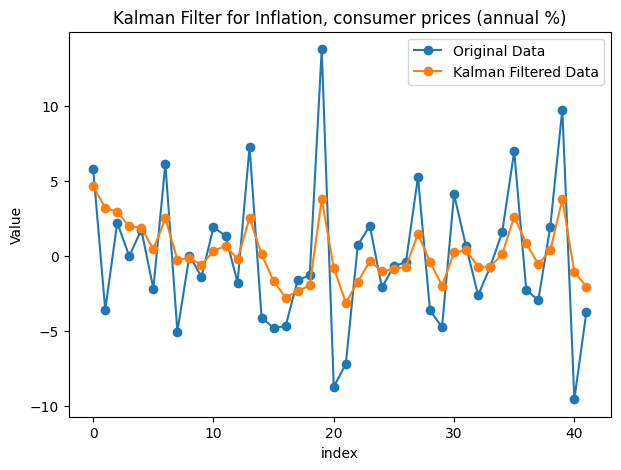

In [ ]:
from pykalman import KalmanFilter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
kalman_filtered_df = df_diff.copy()

for column in df_diff.columns:
  kf = kf.em(df_diff[column], n_iter=10)
  (filtered_state_means, _) = kf.filter(df_diff[column].values)
  kalman_filtered_df[column] = filtered_state_means

  plt.figure(figsize=(7, 5))
  plt.plot(df_diff[column].values, label='Original Data', marker='o')
  plt.plot(filtered_state_means, label='Kalman Filtered Data', linestyle='-', marker='o')
  plt.xlabel('index')
  plt.ylabel('Value')
  plt.title(f"Kalman Filter for {column}")
  plt.legend()
  plt.show()

In [ ]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = kalman_filtered_df.columns
vif_data["VIF"] = [variance_inflation_factor(kalman_filtered_df.values, i) for i in range(len(kalman_filtered_df.columns))]

print(vif_data)

                                             Variable          VIF
0          Real per Capita GDP Growth Rate (annual %)    88.600669
1                          Real GDP growth (annual %)   102.264489
2       Gross domestic product, (constant prices US$)    80.304205
3   Gross domestic product, current prices (curren...   169.295341
4        Final consumption expenditure  (current US$)   335.658746
5   General government final consumption expenditu...    37.049336
6   Household final consumption expenditure (curre...    53.654543
7               Gross capital formation (current US$)   180.578186
8   Gross capital formation, Private sector  (curr...   175.311358
9   Gross capital formation, Public sector  (curre...    82.579127
10        Exports of goods and services (current US$)   479.425686
11        Imports of goods and services (current US$)   280.824787
12          Final consumption expenditure  (% of GDP)   499.313938
13  General government final consumption expenditu...  1664.16

In [ ]:
# Mann_Kendall test
for column in kalman_filtered_df.columns:
  print(mk.original_test(kalman_filtered_df[column]))

Mann_Kendall_Test(trend='no trend', h=False, p=0.1934342049120681, z=1.3004867199647832, Tau=0.140534262485482, s=121.0, var_s=8514.333333333334, slope=0.008943612231534417, intercept=-0.22693189691747412)
Mann_Kendall_Test(trend='no trend', h=False, p=0.08684001256551266, z=1.7123075146202977, Tau=0.18466898954703834, s=159.0, var_s=8514.333333333334, slope=0.007934113587933656, intercept=-0.1905653100888771)
Mann_Kendall_Test(trend='increasing', h=True, p=5.4789506265251475e-12, z=6.892579615813351, Tau=0.7398373983739838, s=637.0, var_s=8514.333333333334, slope=34.17116270174875, intercept=-71.23422568889953)
Mann_Kendall_Test(trend='increasing', h=True, p=1.6153833826137998e-10, z=6.394059706493517, Tau=0.686411149825784, s=591.0, var_s=8514.333333333334, slope=36.77602022334418, intercept=-618.529325362397)
Mann_Kendall_Test(trend='increasing', h=True, p=3.734584863579471e-09, z=5.895539797173684, Tau=0.6329849012775842, s=545.0, var_s=8514.333333333334, slope=27.68350623600115, i

## PCA using the Kalman_filtered data

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_diff_PCA = kalman_filtered_df.copy()

principalComponents = pca.fit_transform(kalman_filtered_df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-1335.292175,-270.191761
1,-1417.319270,-190.785519
2,-1557.044600,-92.516118
3,-1486.082070,-161.033401
4,-1441.754923,-202.807201
5,-1177.949192,-411.311263
6,-1039.874870,-462.395490
7,-1047.593774,-324.350564
8,-1126.824711,-213.100271
9,-893.130619,-315.945898


## VAR model training

In [ ]:
# Fitting the VAR model
from statsmodels.tsa.api import VAR

model = VAR(principalDf)
for i in range (1, 16):
    results = model.fit(i)
    print('Lag =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)

Lag = 1
AIC:  21.764801601130078
BIC:  22.015568245038025
Lag = 2
AIC:  21.8141373413615
BIC:  22.236357204889984
Lag = 3
AIC:  21.332144448459328
BIC:  21.929320423993047
Lag = 4
AIC:  21.47652957759828
BIC:  22.2522282848371
Lag = 5
AIC:  21.538617617708294
BIC:  22.496460700902155
Lag = 6
AIC:  21.63071280708194
BIC:  22.77436537374469
Lag = 7
AIC:  21.74846172498122
BIC:  23.081617206257857
Lag = 8
AIC:  21.896158823556544
BIC:  23.422519348172706
Lag = 9
AIC:  21.449146191101683
BIC:  23.172397322487324
Lag = 10
AIC:  21.0215355744134
BIC:  22.94531394683804
Lag = 11
AIC:  20.446381173044152
BIC:  22.57423315389308
Lag = 12
AIC:  19.96704520325998
BIC:  22.302374172696904
Lag = 13
AIC:  19.023130948718915
BIC:  21.569130080417867
Lag = 14
AIC:  -94.43203431915086
BIC:  -91.67246783378793
Lag = 15
AIC:  -98.39360611574953
BIC:  -95.4179807197396


In [ ]:
# Splitting the data
index = int(0.8 * len(principalDf))

train = principalDf.iloc[:index, :]
test = principalDf.iloc[index:, :]


In [ ]:
forecast_steps = len(principalDf) - index
for i in [9,10,11,12,13]:
  results = model.fit(i)
  forecast = results.forecast(train.values[-i:], steps=forecast_steps)

  forecast_df = pd.DataFrame(forecast, columns=train.columns)

  print(f"Forecasted Values for lag {i}: \n")
  print(forecast_df)

Forecasted Values for lag 9: 

   principal component 1  principal component 2
0            2340.402617             830.318301
1             250.992763            1870.964064
2            -322.943500            1580.880750
3             -33.333750            1053.720850
4             789.134096             439.589576
5             971.463057             295.204250
6             650.333762             426.361749
7            1197.987697             113.030649
8            1820.884401             -78.898716
Forecasted Values for lag 10: 

   principal component 1  principal component 2
0            2306.596979             840.705244
1             276.003408            1826.225853
2            -524.270040            1670.457598
3            -406.377060            1186.327976
4             431.200929             475.940861
5             398.680979             486.166260
6             486.586655             267.144315
7            1444.870516            -211.841641
8            1788.543738 

In [ ]:
test

,principal component 1,principal component 2
33,2433.898631,745.954328
34,-363.409366,2126.328943
35,-1233.478900,1906.013044
36,-909.845446,1225.371992
37,438.282359,201.306458
38,667.402346,118.408611
39,-362.657667,578.689260
40,454.569752,58.356567
41,1618.279197,-489.886921


In [ ]:
forecast_df

,principal component 1,principal component 2
0,2467.565659,736.553361
1,-144.669354,2026.212199
2,-1249.323655,1971.824686
3,-829.978355,1210.103655
4,303.835514,310.514423
5,523.147249,184.979144
6,-339.732738,535.516483
7,488.098653,46.027355
8,1893.899407,-641.800135


In [ ]:
from sklearn.metrics import mean_squared_error

for column in test.columns:
  mse = mean_squared_error(test[column], forecast_df[column])
  print(f"MSE for {column} is {mse}")

MSE for principal component 1 is 19123.577418860066
MSE for principal component 2 is 6236.397053326582


In [ ]:
# Using MAPE instead
from sklearn.metrics import mean_absolute_percentage_error

for column in test.columns:
  mape = mean_absolute_percentage_error(test[column], forecast_df[column])
  print(f"MAPE for {column} is {mape}")


MAPE for principal component 1 is 0.171840295774808
MAPE for principal component 2 is 0.20081761848922722


In [ ]:
# Using RMSPE
def root_mean_squared_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    percentage_errors = ((y_true - y_pred) / y_true) ** 2
    mean_percentage_error = np.mean(percentage_errors)
    rmspe = np.sqrt(mean_percentage_error) * 100
    return rmspe

for column in test.columns:
  rmspe = root_mean_squared_percentage_error(test[column], forecast_df[column])
  print(f"RMSPE for {column} is {rmspe} ")

RMSPE for principal component 1 is 24.712160098264306 
RMSPE for principal component 2 is 29.068293269692465 


## GARCH Model

In [ ]:
!pip install arch

In [ ]:
from arch import arch_model
garch_forecasted_df = pd.DataFrame()

train_rescaled = train.copy()
train_rescaled = train_rescaled * 0.01

for column in train_rescaled.columns:
  model = arch_model(train_rescaled[column], vol='Garch', p=1, q=1)
  results = model.fit(disp='off')
  forecast = results.forecast(horizon= forecast_steps)
  forecast_values = forecast.variance[-1:].values.flatten()

  forecast_df = pd.DataFrame({f'{column}': forecast_values})
  garch_forecasted_df = pd.concat([garch_forecasted_df, forecast_df], axis=1)

print(f"Forecasted Values for p = 1 and q = 1: \n")
print(garch_forecasted_df)

Forecasted Values for p = 1 and q = 1: 

   principal component 1  principal component 2
0            1782.486802              28.030241
1            1787.399920              28.403503
2            1792.313038              28.776765
3            1797.226156              29.150027
4            1802.139275              29.523288
5            1807.052393              29.896550
6            1811.965511              30.269812
7            1816.878629              30.643074
8            1821.791747              31.016336


In [ ]:
# Scaling the test set
test_rescaled = test.copy()
test_rescaled = test_rescaled * 0.01

# Calulating the MAPE
for column in test_rescaled.columns:
  mape = mean_absolute_percentage_error(test_rescaled[column], garch_forecasted_df[column])
  print(f"MAPE for {column} is {mape} ")

MAPE for principal component 1 is 288.9731881659806 
MAPE for principal component 2 is 11.774301634630053 


## Scaling the data

In [ ]:
# Using MinMaxScaler
scaled_df = df_diff.copy()

for column in df_diff.columns:
  min_value = scaled_df[column].min()
  scaled_df[column] = scaled_df[column] - min_value

scaled_df = scaled_df + 0.5
scaled_df = np.log(scaled_df)

In [ ]:
from pykalman import KalmanFilter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
kalman_filtered_df = scaled_df.copy()

for column in scaled_df.columns:
  kf = kf.em(scaled_df[column], n_iter=10)
  (filtered_state_means, _) = kf.filter(scaled_df[column].values)
  kalman_filtered_df[column] = filtered_state_means

In [ ]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_diff_PCA = kalman_filtered_df.copy()

principalComponents = pca.fit_transform(kalman_filtered_df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,15.415879,-2.246102
1,11.343468,-1.987669
2,6.755289,-1.187537
3,3.493612,-0.632363
4,1.523670,-0.258190
5,0.266209,-0.139835
6,-0.549262,-0.035455
7,-1.081863,0.109336
8,-1.380300,0.352628
9,-1.630432,0.353835


In [ ]:
# Splitting the data
index = int(0.8 * len(principalDf))

train = principalDf.iloc[:index, :]
test = principalDf.iloc[index:, :]

In [ ]:
# Fitting the VAR model
from statsmodels.tsa.api import VAR

model = VAR(principalDf)
for i in range (1, 16):
    results = model.fit(i)
    print('Lag =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)

Lag = 1
AIC:  0.9261153980320567
BIC:  1.1768820419400041
Lag = 2
AIC:  0.9504013077374703
BIC:  1.3726211712659544
Lag = 3
AIC:  1.14056012527469
BIC:  1.7377361008084093
Lag = 4
AIC:  1.371247551824053
BIC:  2.1469462590628674
Lag = 5
AIC:  1.6532916479597328
BIC:  2.611134731153596
Lag = 6
AIC:  1.5172937442012953
BIC:  2.660946310864041
Lag = 7
AIC:  -0.08055570217362051
BIC:  1.2525997791030197
Lag = 8
AIC:  -1.7092109379685936
BIC:  -0.18285041335243202
Lag = 9
AIC:  -1.700390330084042
BIC:  0.02286080130160162
Lag = 10
AIC:  -1.5185117970866742
BIC:  0.40526657533796673
Lag = 11
AIC:  -2.0973264722728366
BIC:  0.030525508576090488
Lag = 12
AIC:  -4.464540360308474
BIC:  -2.129211390871549
Lag = 13
AIC:  -6.138905034879789
BIC:  -3.592905903180837
Lag = 14
AIC:  -125.00621040618955
BIC:  -122.24664392082663
Lag = 15
AIC:  -127.51900681991914
BIC:  -124.54338142390921


In [ ]:
# Forecasting
forecast_steps = len(principalDf) - index
for i in [9,10,11,12,13]:
  results = model.fit(i)
  forecast = results.forecast(train.values[-i:], steps=forecast_steps)

  forecast_df = pd.DataFrame(forecast, columns=train.columns)

  print(f"Forecasted Values for lag {i}: \n")
  print(forecast_df)

Forecasted Values for lag 9: 

   principal component 1  principal component 2
0              -2.052458              -0.980530
1               6.585773               4.896840
2               4.560059               4.356338
3               1.793687               2.816539
4              -0.135243               1.438152
5              -1.025866               0.708360
6               0.363429              -0.384395
7              -1.242057               0.098878
8              -2.069507              -0.054652
Forecasted Values for lag 10: 

   principal component 1  principal component 2
0              -2.070001              -0.970459
1               6.587080               4.889996
2               4.557673               4.351277
3               1.765390               2.830475
4              -0.148856               1.423944
5              -1.020499               0.670222
6               0.393872              -0.468933
7              -1.094817               0.045191
8              -1.887061 

In [ ]:
# Using MAPE instead
from sklearn.metrics import mean_absolute_percentage_error

for column in test.columns:
  mape = mean_absolute_percentage_error(test[column], forecast_df[column])
  print(f"MAPE for {column} is {mape}")

MAPE for principal component 1 is 0.03025729495161028
MAPE for principal component 2 is 0.0286315673960871


## Diagnostic tests

In [ ]:
# Ljung-Box test
from statsmodels.tsa.stattools import q_stat
from statsmodels.tsa.stattools import acf

residuals = results.resid

max_lag = 14

ljung_box_p_values = {}

for column in residuals.columns:

    ljung_box_test = q_stat(acf(residuals[column], nlags=max_lag, fft=False), len(residuals))

    ljung_box_p_values[column] = ljung_box_test[1]



print(f"Ljung-Box test p-values: {ljung_box_p_values}")

Ljung-Box test p-values: {'principal component 1': array([1.45899907e-08, 3.11750705e-08, 6.89944999e-09, 1.19095923e-08,
       8.53355194e-09, 3.11060151e-10, 1.00491849e-09, 8.76316516e-10,
       1.77666693e-09, 4.61606512e-10, 8.39094814e-10, 1.84695144e-09,
       3.53251001e-09, 8.22311294e-09, 1.55302822e-08]), 'principal component 2': array([1.45899907e-08, 6.26319262e-09, 2.46271024e-08, 9.29990063e-08,
       1.30775868e-08, 3.29757843e-10, 8.95665537e-10, 2.54183873e-09,
       1.70842208e-09, 2.20938456e-10, 3.17130162e-10, 8.17010708e-10,
       2.00267707e-09, 3.82273557e-09, 6.72713554e-09])}


In [ ]:
# Breusch-Pagan Test
# from statsmodels.compat import lzip
# import statsmodels.stats.api as sms

# residuals = results.resid

# for i, col in enumerate(forecast_df.columns):

#     # Get the residuals for the current equation

#     residuals = results.resid[col]



#     # Perform the Breusch-Pagan test

#     bp_test = sms.het_breuschpagan(residuals, results.endog)

#     # Print the results

#     print(f"Breusch-Pagan test for {col}:")

#     print(f"LM Statistic: {bp_test[0]:.4f}")

#     print(f"LM-Test p-value: {bp_test[1]:.4f}")

#     print(f"F-Statistic: {bp_test[2]:.4f}")

#     print(f"F-Test p-value: {bp_test[3]:.4f}\n")


In [ ]:
# Jarque-Bera test
from scipy.stats import jarque_bera
jbtest = jarque_bera(results.resid)

print(jbtest)
# print('Jarque-Bera Wald Test for Normality')

# print('Skewness of Residuals = ', jbtest[2])

# print('Kurtosis of Residuals = ', jbtest[3])

df2 = pd.Series({'Chi-Sq( 2)':jbtest[0], 'Prob>Chi-Sq':jbtest[1]})

print(df2)

SignificanceResult(statistic=42.506517747243166, pvalue=5.886090683402255e-10)
Chi-Sq( 2)     4.250652e+01
Prob>Chi-Sq    5.886091e-10
dtype: float64


## XGBoost training

In [ ]:
!pip install xgboost

In [ ]:
# Adding the trend as a feature
result = seasonal_decompose(df_mean['Inflation, consumer prices (annual %)'], model='additive', period = 10)

trend = result.trend

trend = trend.fillna(trend.mean())

df_mean_trend = df_mean.copy()
df_mean_trend['trend'] = trend

df_mean_trend.head()

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)",trend
Year,,,,,,,,,,,,,,,,,,,,,
1980,0.971532,3.481958,13600.737325,10415.857407,5500.209700,1159.187997,4341.023179,1846.959092,1620.237774,1056.797145,...,-281.629445,2004.025804,2266.199297,-5.651655,21.493650,26.743294,50.018376,-7.163063,13.037703,12.831156
1981,-0.823321,2.054507,13744.409177,9891.282407,5863.216552,1239.321330,4623.896142,1973.862981,1662.408118,987.463475,...,-490.911667,1975.049508,2446.505408,-6.331100,21.026243,26.955887,-329.303846,-7.639730,18.850817,12.831156
1982,-0.179432,2.695989,14005.087510,9709.049444,5777.038774,1224.212441,4552.826883,1752.806685,1528.729229,893.654771,...,-634.604260,1927.186545,2542.335408,-7.022581,22.110131,28.731072,-324.617735,-8.777878,15.254397,12.831156
1983,-2.354617,0.458581,14052.476584,9884.352963,5491.232478,1205.945960,4285.286327,1646.330389,1413.759970,883.438104,...,-542.346297,1849.040184,2389.676890,-5.822952,21.503899,27.217183,-160.231068,-5.734730,17.481248,12.831156
1984,-0.871840,1.970618,14500.541769,9642.634259,5335.803034,1149.978923,4185.822994,1572.464463,1408.189229,818.120512,...,-500.135371,1824.868147,2323.293001,-5.108322,21.344269,26.342183,-113.255513,-5.128804,17.460508,12.831156


In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split

X = df_mean_trend.drop('Inflation, consumer prices (annual %)', axis =1)
y = df_mean_trend['Inflation, consumer prices (annual %)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Choosing the most important features above a given threshold
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

selected_features_indices = [i for i, importance in enumerate(feature_importances) if importance >= 0.05]

X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

len(X_train_selected.columns)

5

In [ ]:
# Training
import xgboost as xgb

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train_selected, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

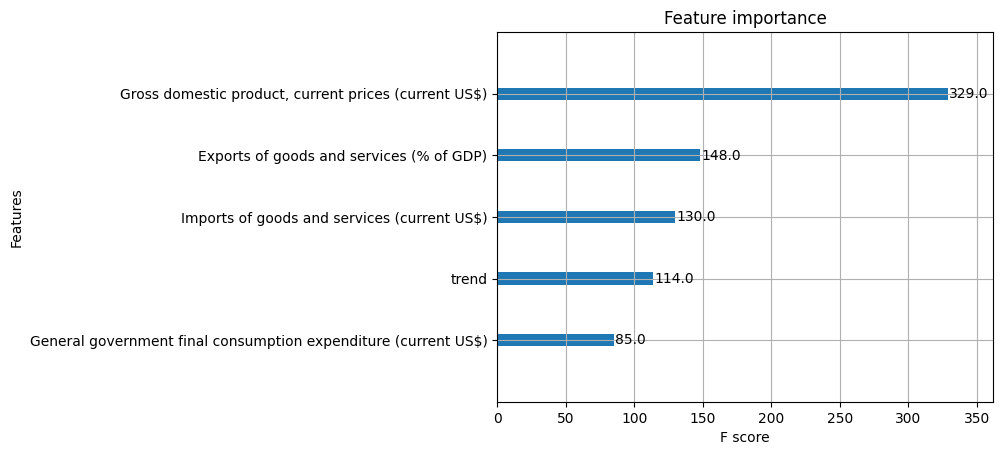

In [ ]:
# Plotting the feature importances
xgb.plot_importance(reg)

In [ ]:
# Predicting and evaluating
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

predictions = reg.predict(X_test_selected)

print('RMSE: ', mean_squared_error(y_test,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test,y_pred=predictions))

RMSE:  6.826742801731621
MAE:  1.9739696041355268
MAPE:  0.16670391842719018


### PCA before training

In [ ]:
# Using PCA to train
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_diff_PCA = df_mean.copy()

df_diff_PCA = df_diff_PCA.drop(columns=['Inflation, consumer prices (annual %)'])

principalComponents = pca.fit_transform(df_diff_PCA)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-24798.400185,2687.461641
1,-24701.953817,2171.950087
2,-24901.915823,1713.209515
3,-25153.748597,1678.033420
4,-25219.241206,1369.065884
5,-25138.057425,988.020438
6,-25316.270357,299.402758
7,-24782.456879,234.812832
8,-23800.501437,70.071095
9,-23286.665839,-107.934234


In [ ]:
# Splitting
X = principalDf
y = df_mean['Inflation, consumer prices (annual %)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = reg.predict(X_test)

print('RMSE: ', mean_squared_error(y_test,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test,y_pred=predictions))

RMSE:  7.143482506145323
MAE:  1.9144322470654282
MAPE:  0.1643359675444553


### Adding lag in the features

In [ ]:
# Adding the lagg

df_with_lag = df_mean_trend.copy()

df_with_lag['lag'] = df_with_lag['Inflation, consumer prices (annual %)'].shift(1)

df_with_lag['lag'] = df_with_lag['lag'].fillna(df_with_lag['lag'].mean())

df_with_lag.head()

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,"Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)",trend,lag
Year,,,,,,,,,,,,,,,,,,,,,
1980,0.971532,3.481958,13600.737325,10415.857407,5500.209700,1159.187997,4341.023179,1846.959092,1620.237774,1056.797145,...,2004.025804,2266.199297,-5.651655,21.493650,26.743294,50.018376,-7.163063,13.037703,12.831156,13.196307
1981,-0.823321,2.054507,13744.409177,9891.282407,5863.216552,1239.321330,4623.896142,1973.862981,1662.408118,987.463475,...,1975.049508,2446.505408,-6.331100,21.026243,26.955887,-329.303846,-7.639730,18.850817,12.831156,13.037703
1982,-0.179432,2.695989,14005.087510,9709.049444,5777.038774,1224.212441,4552.826883,1752.806685,1528.729229,893.654771,...,1927.186545,2542.335408,-7.022581,22.110131,28.731072,-324.617735,-8.777878,15.254397,12.831156,18.850817
1983,-2.354617,0.458581,14052.476584,9884.352963,5491.232478,1205.945960,4285.286327,1646.330389,1413.759970,883.438104,...,1849.040184,2389.676890,-5.822952,21.503899,27.217183,-160.231068,-5.734730,17.481248,12.831156,15.254397
1984,-0.871840,1.970618,14500.541769,9642.634259,5335.803034,1149.978923,4185.822994,1572.464463,1408.189229,818.120512,...,1824.868147,2323.293001,-5.108322,21.344269,26.342183,-113.255513,-5.128804,17.460508,12.831156,17.481248


In [ ]:
# Splitting
X = df_with_lag.drop('Inflation, consumer prices (annual %)', axis =1)
y = df_with_lag['Inflation, consumer prices (annual %)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = reg.predict(X_test)

print('RMSE: ', mean_squared_error(y_test,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test,y_pred=predictions))

RMSE:  7.286748332700973
MAE:  2.2164713318675737
MAPE:  0.20821968124008639


### Trying PCA in addition to lag and trend

In [ ]:
# Trying out the PCA

pca = PCA(n_components = 2)
df_diff_PCA = df_mean.copy()

df_diff_PCA = df_with_lag.drop(columns=['Inflation, consumer prices (annual %)', 'lag', 'trend'])

principalComponents = pca.fit_transform(df_diff_PCA)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-24798.400185,2687.461641
1,-24701.953817,2171.950087
2,-24901.915823,1713.209515
3,-25153.748597,1678.033420
4,-25219.241206,1369.065884
5,-25138.057425,988.020438
6,-25316.270357,299.402758
7,-24782.456879,234.812832
8,-23800.501437,70.071095
9,-23286.665839,-107.934234


In [ ]:
# Adding trend and lag as features
principalDf.index = df_with_lag.index
df_pca_trend_lag = principalDf.copy()
df_pca_trend_lag['trend'] = df_with_lag['trend']
df_pca_trend_lag['lag'] = df_with_lag['lag']

df_pca_trend_lag.head()

,principal component 1,principal component 2,trend,lag
Year,,,,
1980,-24798.400185,2687.461641,12.831156,13.196307
1981,-24701.953817,2171.950087,12.831156,13.037703
1982,-24901.915823,1713.209515,12.831156,18.850817
1983,-25153.748597,1678.033420,12.831156,15.254397
1984,-25219.241206,1369.065884,12.831156,17.481248


In [ ]:
# Splitting
X = df_pca_trend_lag
y = df_with_lag['Inflation, consumer prices (annual %)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = reg.predict(X_test)

print('RMSE: ', mean_squared_error(y_test,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test,y_pred=predictions))

RMSE:  5.751232326864295
MAE:  1.9191085791074787
MAPE:  0.15920698615917409


In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

predictions = best_xgb_model.predict(X_test)

print('RMSE: ', mean_squared_error(y_test,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test,y_pred=predictions))

RMSE:  5.198469299326993
MAE:  1.9761427929999715
MAPE:  0.22503503251989715


## Using the differenced dataframe with kalman filter

In [ ]:
# Adding the lag
df_with_lag = df_diff.copy()

df_with_lag['lag'] = df_with_lag['Inflation, consumer prices (annual %)'].shift(1)

df_with_lag['lag'] = df_with_lag['lag'].fillna(df_with_lag['lag'].mean())

df_with_lag.head()

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)",lag
Year,,,,,,,,,,,,,,,,,,,,,
1981,-1.794853,-1.427451,143.671852,-524.575000,363.006852,80.133333,282.872963,126.903889,42.170344,-69.333671,...,-209.282222,-28.976296,180.306111,-0.679444,-0.467407,0.212593,-379.322222,-0.476667,5.813114,-0.070781
1982,0.643889,0.641481,260.678333,-182.232963,-86.177778,-15.108889,-71.069259,-221.056296,-133.678889,-93.808704,...,-143.692593,-47.862963,95.830000,-0.691481,1.083889,1.775185,4.686111,-1.138148,-3.596421,5.813114
1983,-2.175185,-2.237407,47.389074,175.303519,-285.806296,-18.266481,-267.540556,-106.476296,-114.969259,-10.216667,...,92.257963,-78.146361,-152.658519,1.199630,-0.606233,-1.513889,164.386667,3.043148,2.226852,-3.596421
1984,1.482778,1.512037,448.065185,-241.718704,-155.429444,-55.967037,-99.463333,-73.865926,-5.570741,-65.317593,...,42.210926,-24.172037,-66.383889,0.714630,-0.159630,-0.875000,46.975556,0.605926,-0.020741,2.226852
1985,2.142407,2.222037,523.378704,-62.985556,-54.361667,-22.824815,-31.535926,-89.759074,-99.862778,-8.852037,...,103.416852,44.587037,-58.828889,0.597037,-0.004259,-0.600741,124.529074,0.680185,1.752963,-0.020741


In [ ]:
# Kalman filter

from pykalman import KalmanFilter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
kalman_filtered_df = df_with_lag.copy()

for column in df_with_lag.columns:
  kf = kf.em(df_with_lag[column], n_iter=10)
  (filtered_state_means, _) = kf.filter(df_with_lag[column].values)
  kalman_filtered_df[column] = filtered_state_means


In [ ]:
# PCA on kalman filtered data
pca = PCA(n_components = 2)
df_diff_PCA = kalman_filtered_df.copy()

df_diff_PCA = kalman_filtered_df.drop(columns=['Inflation, consumer prices (annual %)'])

principalComponents = pca.fit_transform(df_diff_PCA)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-1335.292521,-270.193940
1,-1417.320186,-190.787037
2,-1557.045079,-92.517355
3,-1486.082803,-161.034191
4,-1441.755353,-202.807888
5,-1177.950089,-411.311355
6,-1039.874473,-462.396446
7,-1047.594940,-324.350370
8,-1126.824925,-213.099889
9,-893.130928,-315.945351


In [ ]:
# Splitting
X = principalDf
y = kalman_filtered_df['Inflation, consumer prices (annual %)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Hyperparameter tuning, training, and evaluating
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

predictions = best_xgb_model.predict(X_test)

print('RMSE: ', mean_squared_error(y_test,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test,y_pred=predictions))

RMSE:  4.1796540703255385
MAE:  1.5287368552351368
MAPE:  1.9424521229102476


## Trying different approach

In [ ]:
df_diff.head()

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,,,,,,,,,,,,,,,,,,,,,
1981,-1.794853,-1.427451,143.671852,-524.575000,363.006852,80.133333,282.872963,126.903889,42.170344,-69.333671,...,1.479259,-209.282222,-28.976296,180.306111,-0.679444,-0.467407,0.212593,-379.322222,-0.476667,5.813114
1982,0.643889,0.641481,260.678333,-182.232963,-86.177778,-15.108889,-71.069259,-221.056296,-133.678889,-93.808704,...,-0.515000,-143.692593,-47.862963,95.830000,-0.691481,1.083889,1.775185,4.686111,-1.138148,-3.596421
1983,-2.175185,-2.237407,47.389074,175.303519,-285.806296,-18.266481,-267.540556,-106.476296,-114.969259,-10.216667,...,-2.513333,92.257963,-78.146361,-152.658519,1.199630,-0.606233,-1.513889,164.386667,3.043148,2.226852
1984,1.482778,1.512037,448.065185,-241.718704,-155.429444,-55.967037,-99.463333,-73.865926,-5.570741,-65.317593,...,0.037778,42.210926,-24.172037,-66.383889,0.714630,-0.159630,-0.875000,46.975556,0.605926,-0.020741
1985,2.142407,2.222037,523.378704,-62.985556,-54.361667,-22.824815,-31.535926,-89.759074,-99.862778,-8.852037,...,-0.577963,103.416852,44.587037,-58.828889,0.597037,-0.004259,-0.600741,124.529074,0.680185,1.752963


In [ ]:
# Kalman filter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
kalman_filtered_df = df_diff.copy()

for column in df_diff.columns:
  kf = kf.em(df_diff[column], n_iter=10)
  (filtered_state_means, _) = kf.filter(df_diff[column].values)
  kalman_filtered_df[column] = filtered_state_means

In [ ]:
# PCA
pca = PCA(n_components = 2)
df_diff_PCA = kalman_filtered_df.copy()

df_diff_PCA = df_diff_PCA.drop(columns=['Inflation, consumer prices (annual %)'])

principalComponents = pca.fit_transform(df_diff_PCA)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-1335.290619,-270.193579
1,-1417.318249,-190.786672
2,-1557.043686,-92.517110
3,-1486.081516,-161.033967
4,-1441.754396,-202.807735
5,-1177.949198,-411.311207
6,-1039.874097,-462.396401
7,-1047.594021,-324.350212
8,-1126.824925,-213.099929
9,-893.130990,-315.945399


In [ ]:
# Splitting
X = principalDf
y = kalman_filtered_df['Inflation, consumer prices (annual %)']

index = int(0.8 * len(principalDf))

X_train = X.iloc[:index, :]
X_test = X.iloc[index:, :]

y_train = y.iloc[:index]
y_test = y.iloc[index:]

In [ ]:
# Training
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predicting
predictions = reg.predict(X_test)

print('RMSE: ', mean_squared_error(y_test,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test,y_pred=predictions))

RMSE:  3.620531450900119
MAE:  1.558192722308022
MAPE:  2.1153018448121386


### Using cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

k_folds = KFold(n_splits = 5)

reg = xgb.XGBRegressor(n_estimators=1000)
scores = cross_val_score(reg, X, y, cv=k_folds)

print("Cross Validation Scores: ", scores)

Cross Validation Scores:  [ 0.17241907  0.18887837 -0.01971578 -5.46672323 -0.26209932]


### Using the data without differencing

In [ ]:
df_mean.head()

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,,,,,,,,,,,,,,,,,,,,,
1980,0.971532,3.481958,13600.737325,10415.857407,5500.209700,1159.187997,4341.023179,1846.959092,1620.237774,1056.797145,...,36.167058,-281.629445,2004.025804,2266.199297,-5.651655,21.493650,26.743294,50.018376,-7.163063,13.037703
1981,-0.823321,2.054507,13744.409177,9891.282407,5863.216552,1239.321330,4623.896142,1973.862981,1662.408118,987.463475,...,37.646317,-490.911667,1975.049508,2446.505408,-6.331100,21.026243,26.955887,-329.303846,-7.639730,18.850817
1982,-0.179432,2.695989,14005.087510,9709.049444,5777.038774,1224.212441,4552.826883,1752.806685,1528.729229,893.654771,...,37.131317,-634.604260,1927.186545,2542.335408,-7.022581,22.110131,28.731072,-324.617735,-8.777878,15.254397
1983,-2.354617,0.458581,14052.476584,9884.352963,5491.232478,1205.945960,4285.286327,1646.330389,1413.759970,883.438104,...,34.617984,-542.346297,1849.040184,2389.676890,-5.822952,21.503899,27.217183,-160.231068,-5.734730,17.481248
1984,-0.871840,1.970618,14500.541769,9642.634259,5335.803034,1149.978923,4185.822994,1572.464463,1408.189229,818.120512,...,34.655762,-500.135371,1824.868147,2323.293001,-5.108322,21.344269,26.342183,-113.255513,-5.128804,17.460508


In [ ]:
# Splitting
X = df_mean.drop(columns=['Inflation, consumer prices (annual %)'])
y = df_mean['Inflation, consumer prices (annual %)']

index = int(0.8 * len(principalDf))

X_train = X.iloc[:index, :]
X_test = X.iloc[index:, :]

y_train = y.iloc[:index]
y_test = y.iloc[index:]

In [ ]:
# Training
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predicting
predictions = reg.predict(X_test)

print('RMSE: ', mean_squared_error(y_test,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test,y_pred=predictions))

RMSE:  21.13880393821195
MAE:  3.5763918686503464
MAPE:  0.3708365586275478


## Using SVM model on kalman-filtered data

In [ ]:
# Splitting the kalman filtered data

X = principalDf

y = kalman_filtered_df['Inflation, consumer prices (annual %)']

index = int(0.8 * len(principalDf))

X_train = X.iloc[:index, :]
X_test = X.iloc[index:, :]

y_train = y.iloc[:index]
y_test = y.iloc[index:]

In [ ]:
# Training
from sklearn.svm import SVR

svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
# Predicting
predictions = svm_model.predict(X_test)

print('RMSE: ', mean_squared_error(y_test,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test,y_pred=predictions))

RMSE:  2.771877995129419
MAE:  1.2158302850630465
MAPE:  1.123873833331834


In [ ]:
# Cross-validation
from sklearn.model_selection import TimeSeriesSplit

time_split = TimeSeriesSplit(n_splits=5)

svm_model = SVR(kernel='linear', C=1.0)

scores = cross_val_score(svm_model, X, y, cv=time_split)

print("Cross Validation Scores: ", scores)

Cross Validation Scores:  [-1.65255525e+02 -3.55247218e-01 -1.93952388e+02 -2.66763490e+00
  1.34791036e-01]


In [ ]:
for i, (train_index, test_index) in enumerate(time_split.split(X), 1):
    if i == 4 + 1:
        X_train_best_split, X_test_best_split = X.iloc[train_index], X.iloc[test_index]
        y_train_best_split, y_test_best_split = y.iloc[train_index], y.iloc[test_index]
        break

In [ ]:
svm_model.fit(X_train_best_split, y_train_best_split)
predictions = svm_model.predict(X_test_best_split)

print('RMSE: ', mean_squared_error(y_test_best_split,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test_best_split,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test_best_split,y_pred=predictions))

RMSE:  3.1560538999906464
MAE:  1.385293082120897
MAPE:  0.9060849998346371


In [ ]:
# Hyperparapeter tuning
from sklearn.model_selection import RandomizedSearchCV
svm_model = SVR()
param_grid = {
    'kernel' :['linear', 'rbf', 'sigmoid', 'poly'],
    'C': [1.0, 10, 50, 100],
    'epsilon': [0.01, 0.1, 0.5, 1.0],
}

random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, n_iter=5, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

best_svm_model = random_search.best_estimator_

In [ ]:
print(best_params)

{'kernel': 'rbf', 'epsilon': 0.1, 'C': 1.0}


In [ ]:
best_svm_model.fit(X_train, y_train)
predictions = best_svm_model.predict(X_test)

print('RMSE: ', mean_squared_error(y_test,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test,y_pred=predictions))

RMSE:  4.036411639203696
MAE:  1.470190866996877
MAPE:  1.479416778524949


## Using SVM on the original data

In [ ]:
X = df_diff.drop(columns=['Inflation, consumer prices (annual %)'])

y = df_diff['Inflation, consumer prices (annual %)']

index = int(0.8 * len(principalDf))

X_train = X.iloc[:index, :]
X_test = X.iloc[index:, :]

y_train = y.iloc[:index]
y_test = y.iloc[index:]

In [ ]:
# Training
from sklearn.svm import SVR

svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
# Predicting
predictions = svm_model.predict(X_test)

print('RMSE: ', mean_squared_error(y_test,y_pred=predictions))
print('MAE: ', mean_absolute_error(y_test,y_pred=predictions))
print('MAPE: ', mean_absolute_percentage_error(y_test,y_pred=predictions))

RMSE:  197.55044926210968
MAE:  10.637020115367777
MAPE:  3.9747738423678864
